In [41]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#the data needed to be also validated. The train dataset should have been split into two section, one for training and another one for validation.

In [2]:
df = pd.read_csv("/content/drive/MyDrive/train.csv")


In [15]:
df = df.drop(df.index[100:17201])
df.head()

,id,timestamp,number_of_requests,number_of_errors,response_time,cpu_cores,memory_usage,cpu_usage
0,0,2022-01-22 17:12:22,9758,0.0,14742.755324,6,0.347599,48.498589
1,1,2022-01-22 17:12:27,9967,2.0,14897.201621,6,0.756413,53.355349
2,2,2022-01-22 17:12:32,5210,1.0,14009.132817,6,0.698468,46.573140
3,3,2022-01-22 17:12:37,7361,1.0,14716.491537,6,0.137349,46.624516
4,4,2022-01-22 17:12:42,9667,0.0,15148.657690,6,0.157933,49.455284


In [16]:
df.shape[0]

34498

In [17]:
training_set = df.iloc[:,7:8].values
print(training_set)
print(training_set.shape)

[[48.49858857]
 [53.3553491 ]
 [46.57314029]
 ...
 [47.58593228]
 [48.17824268]
 [51.3719051 ]]
(34498, 1)


In [18]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set


array([[0.48236219],
       [0.53117722],
       [0.46300962],
       ...,
       [0.47318913],
       [0.47914241],
       [0.51124173]])

In [19]:
X_train = []
y_train = []
for i in range(60,34498):
  X_train.append(scaled_training_set[i-60:i, 0])
  y_train.append(scaled_training_set[i,0])
X_train = np.array(X_train)
y_train = np.array(y_train)
print(X_train.shape)
print(y_train.shape)

(34438, 60)
(34438,)


In [20]:
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))
X_train.shape

(34438, 60, 1)

In [21]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [22]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences= True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50,return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50,return_sequences= True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [24]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error')
regressor.fit(X_train,y_train,epochs = 10, batch_size = 32)

Epoch 1/10
1077/1077 [==============================] - 133s 115ms/step - loss: 0.0068
Epoch 2/10
1077/1077 [==============================] - 125s 116ms/step - loss: 0.0061
Epoch 3/10
1077/1077 [==============================] - 125s 116ms/step - loss: 0.0058
Epoch 4/10
1077/1077 [==============================] - 125s 116ms/step - loss: 0.0057
Epoch 5/10
1077/1077 [==============================] - 125s 116ms/step - loss: 0.0056
Epoch 6/10
1077/1077 [==============================] - 126s 117ms/step - loss: 0.0056
Epoch 7/10
1077/1077 [==============================] - 126s 117ms/step - loss: 0.0040
Epoch 8/10
1077/1077 [==============================] - 126s 117ms/step - loss: 0.0036
Epoch 9/10
1077/1077 [==============================] - 139s 129ms/step - loss: 0.0035
Epoch 10/10
1077/1077 [==============================] - 133s 123ms/step - loss: 0.0034


In [55]:
df_test = pd.read_csv("/content/drive/MyDrive/train.csv")
df_test["cpu_usage"] = ""


In [45]:
dataset_total = pd.concat((df['cpu_usage'],df_test['cpu_usage']), axis=0)
inputs = dataset_total[len(dataset_total)- len(df_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range (60,80):
  X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))

In [48]:
predict_cpu = regressor.predict(X_test)
predict_cpu = scaler.inverse_transform(predict_cpu)

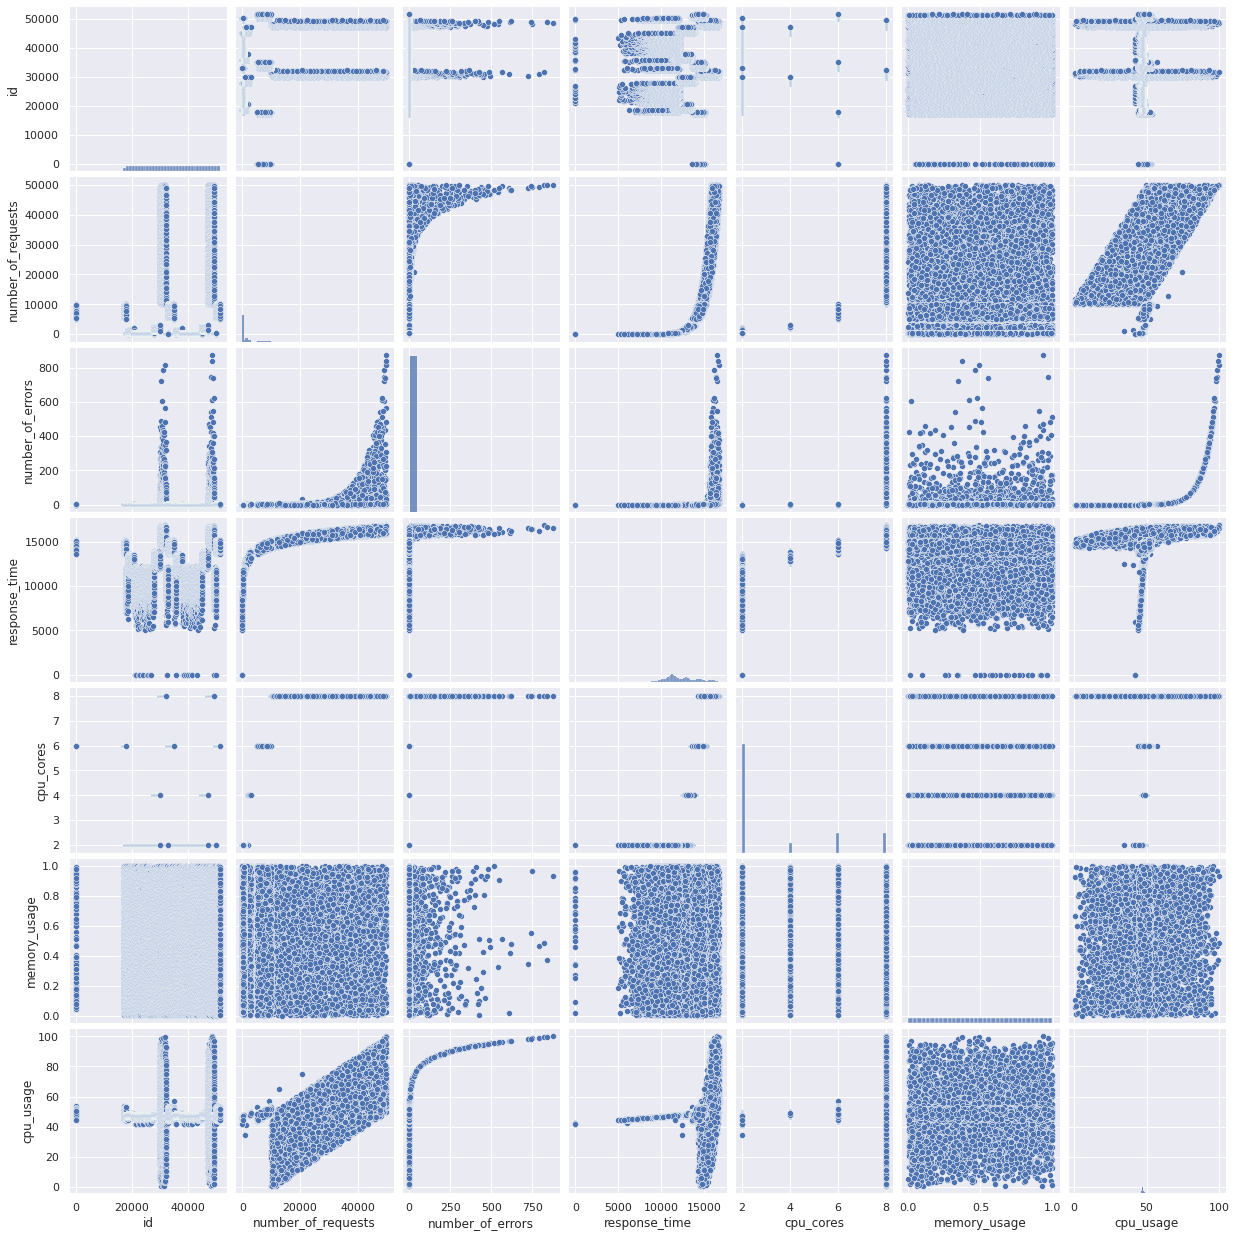

In [42]:
plt.rcParams['figure.figsize'] = [16,9]
sns.set(style='darkgrid')
sns.pairplot(data=df) 

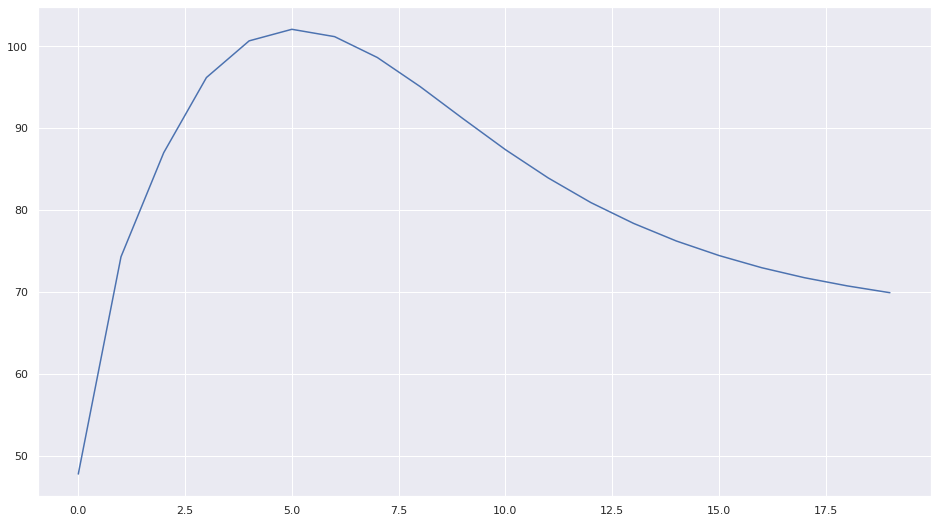

In [54]:
plt.plot(predict_cpu)